# Data processing for diabetes dataset 

In [14]:
import pandas as pd

data = pd.read_csv("../../data/diabetes.csv")

In [15]:
data.head(10)

,num_pregnant,plas_glucose_concentr,blood_pressure,skin_thick,insulin,mass_index,pedigree_fun,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
5,5,116,74,0,0,25.6,0.201,30,tested_negative
6,3,78,50,32,88,31.0,0.248,26,tested_positive
7,10,115,0,0,0,35.3,0.134,29,tested_negative
8,2,197,70,45,543,30.5,0.158,53,tested_positive
9,8,125,96,0,0,0.0,0.232,54,tested_positive


In [16]:
data['class'] = data['class'].map({
    'tested_positive' : 1,
    'tested_negative' : 0
})
data.head(10)

,num_pregnant,plas_glucose_concentr,blood_pressure,skin_thick,insulin,mass_index,pedigree_fun,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [17]:
# Columns you want to check
columns_to_check = ['plas_glucose_concentr', 'blood_pressure', 'mass_index']

# Create a mask that checks where the values in the selected columns are equal to 0
zero_mask = (data[columns_to_check] == 0)

# Count the number of zeros in each row
zero_count_per_row = zero_mask.sum(axis=1)

# Select rows where at least 3 columns have a value equal to 0
indexes_to_delete = data[zero_count_per_row >= 2].index.values
data = data.drop(indexes_to_delete)
data[zero_count_per_row >= 2]

,num_pregnant,plas_glucose_concentr,blood_pressure,skin_thick,insulin,mass_index,pedigree_fun,age,class


In [18]:
# changing values that equals 0 to missing values in plas_glucose_concentr column
indexes = data[data['plas_glucose_concentr'] == 0].loc[:, 'plas_glucose_concentr'].index.values
data.loc[indexes, 'plas_glucose_concentr'] = None
data.loc[indexes]


,num_pregnant,plas_glucose_concentr,blood_pressure,skin_thick,insulin,mass_index,pedigree_fun,age,class
75,1,NaN,48,20,0,24.7,0.140,22,0
182,1,NaN,74,20,23,27.7,0.299,21,0
342,1,NaN,68,35,0,32.0,0.389,22,0
349,5,NaN,80,32,0,41.0,0.346,37,1
502,6,NaN,68,41,0,39.0,0.727,41,1


In [19]:
# changing values that equals 0 to missing values in blood_pressure column
indexes = data[data['blood_pressure'] == 0].loc[:, 'blood_pressure'].index.values
data.loc[indexes, 'blood_pressure'] = None
data.loc[indexes]

,num_pregnant,plas_glucose_concentr,blood_pressure,skin_thick,insulin,mass_index,pedigree_fun,age,class
7,10,115.0,NaN,0,0,35.3,0.134,29,0
15,7,100.0,NaN,0,0,30.0,0.484,32,1
78,0,131.0,NaN,0,0,43.2,0.270,26,1
172,2,87.0,NaN,23,0,28.9,0.773,25,0
193,11,135.0,NaN,0,0,52.3,0.578,40,1
222,7,119.0,NaN,0,0,25.2,0.209,37,0
261,3,141.0,NaN,0,0,30.0,0.761,27,1
266,0,138.0,NaN,0,0,36.3,0.933,25,1
269,2,146.0,NaN,0,0,27.5,0.240,28,1
300,0,167.0,NaN,0,0,32.3,0.839,30,1


In [20]:
# changing values that equals 0 to missing values in skin_thick column
indexes = data[data['skin_thick'] == 0].loc[:, 'skin_thick'].index.values
data.loc[indexes, 'skin_thick'] = None
data.loc[indexes]

,num_pregnant,plas_glucose_concentr,blood_pressure,skin_thick,insulin,mass_index,pedigree_fun,age,class
2,8,183.0,64.0,NaN,0,23.3,0.672,32,1
5,5,116.0,74.0,NaN,0,25.6,0.201,30,0
7,10,115.0,NaN,NaN,0,35.3,0.134,29,0
9,8,125.0,96.0,NaN,0,0.0,0.232,54,1
10,4,110.0,92.0,NaN,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123.0,72.0,NaN,0,36.3,0.258,52,1
758,1,106.0,76.0,NaN,0,37.5,0.197,26,0
759,6,190.0,92.0,NaN,0,35.5,0.278,66,1
762,9,89.0,62.0,NaN,0,22.5,0.142,33,0


In [21]:
# changing values that equals 0 to missing values in skin_thick column
indexes = data[data['insulin'] == 0].loc[:, 'insulin'].index.values
data.loc[indexes, 'insulin'] = None
data.loc[indexes]

,num_pregnant,plas_glucose_concentr,blood_pressure,skin_thick,insulin,mass_index,pedigree_fun,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [22]:
# changing values that equals 0 to missing values in skin_thick column
indexes = data[data['mass_index'] == 0].loc[:, 'mass_index'].index.values
data.loc[indexes, 'mass_index'] = None
data.loc[indexes]

,num_pregnant,plas_glucose_concentr,blood_pressure,skin_thick,insulin,mass_index,pedigree_fun,age,class
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
145,0,102.0,75.0,23.0,NaN,NaN,0.572,21,0
371,0,118.0,64.0,23.0,89.0,NaN,1.731,21,0
684,5,136.0,82.0,NaN,NaN,NaN,0.640,69,0


In [23]:
data.isnull().sum()

num_pregnant               0
plas_glucose_concentr      5
blood_pressure            28
skin_thick               220
insulin                  367
mass_index                 4
pedigree_fun               0
age                        0
class                      0
dtype: int64

## Check

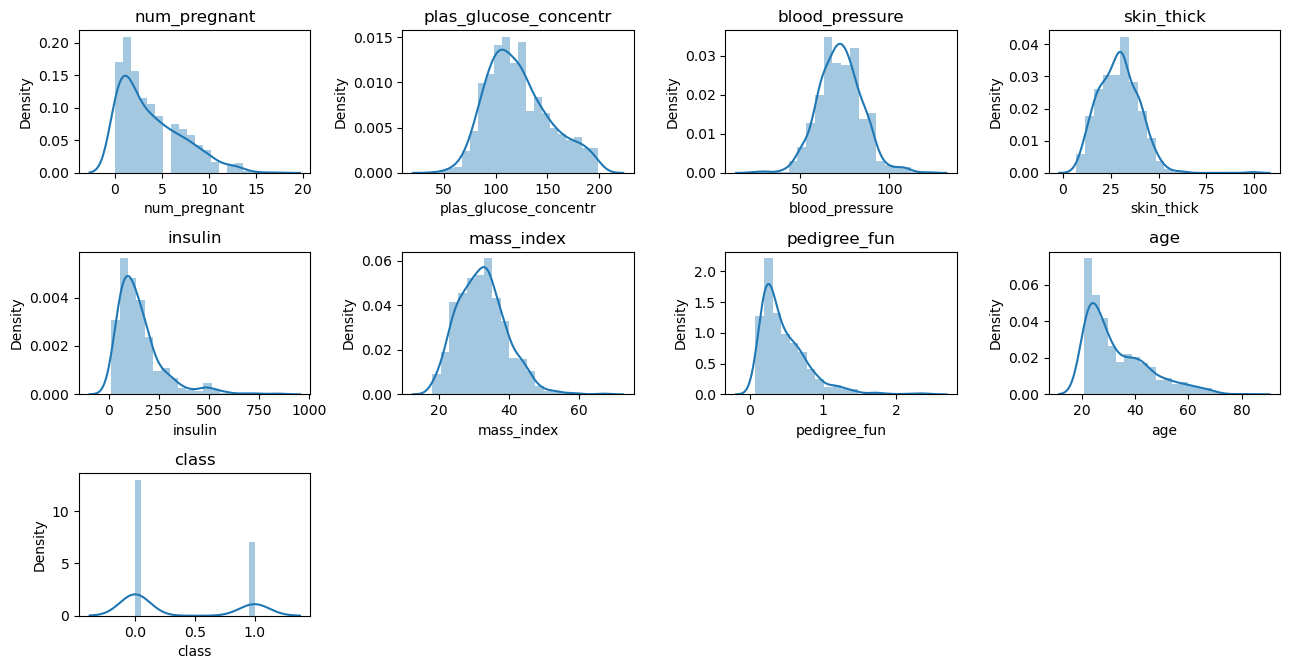

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

r = 6
c = 4

plt.figure(figsize=(13, 13))

for i, column in enumerate(data.columns):
    plt.subplot(r, c, i+1)
    dis_dist = sns.distplot(data[column], bins=20)
    dis_dist.set_title(f'{column}')  

plt.tight_layout() 
plt.show()

## Save

In [25]:
data.to_csv("../../data/processed/diabetes.csv", index=False)

## Double Check

In [26]:
import pandas as pd
data = pd.read_csv("../../data/processed/diabetes.csv")
data.head()

,num_pregnant,plas_glucose_concentr,blood_pressure,skin_thick,insulin,mass_index,pedigree_fun,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
